In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv(r"C:\Users\uggev\Downloads\archive (3)\spam.csv", encoding='latin-1')


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\uggev\Downloads\archive (3)\spam.csv", encoding='latin-1')

# Display the first few rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
import re
from sklearn.model_selection import train_test_split

# Clean the text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = text.lower()  # convert to lowercase
    return text

df['v2'] = df['v2'].apply(clean_text)

# Check the cleaned data
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go until jurong point crazy available only in ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,ham,u dun say so early hor u c already then say,NaN,NaN,NaN
4,ham,nah i don t think he goes to usf he lives arou...,NaN,NaN,NaN


In [13]:
X = df['v2']  # SMS messages
y = df['v1']  # Labels (ham/spam)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [19]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC()

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [21]:
# Train the final model on all data
final_model = MultinomialNB()
final_model.fit(vectorizer.fit_transform(X), y)

# Sample prediction (You can test it with new SMS messages)
sample_message = ["Congratulations, you've won a free ticket!"]
sample_tfidf = vectorizer.transform(sample_message)
prediction = final_model.predict(sample_tfidf)

print("Predicted Label:", prediction)


Predicted Label: ['ham']


In [25]:
# Create a TF-IDF vectorizer and fit it on the training data
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [27]:
# Sample email to predict
sample_email = ["Congratulations! You've won a huge cash prize. Click here to claim it!"]

# Clean and transform the email content using the fitted vectorizer
sample_email_cleaned = [clean_text(email) for email in sample_email]
sample_tfidf = vectorizer.transform(sample_email_cleaned)

# Predict if the email is fraud or not
prediction = nb_model.predict(sample_tfidf)

# Output the prediction
if prediction[0] == 1:
    print("The email is fraudulent.")
else:
    print("The email is not fraudulent.")


The email is not fraudulent.


In [31]:
# Check the column names of your DataFrame
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [33]:
# Rename columns for clarity
df.columns = ['label', 'email_body', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

# Drop the unnecessary columns (if they are empty or irrelevant)
df = df[['label', 'email_body']]


  label                                         email_body
0   ham  go until jurong point crazy available only in ...
1   ham                           ok lar joking wif u oni 
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham       u dun say so early hor u c already then say 
4   ham  nah i don t think he goes to usf he lives arou...


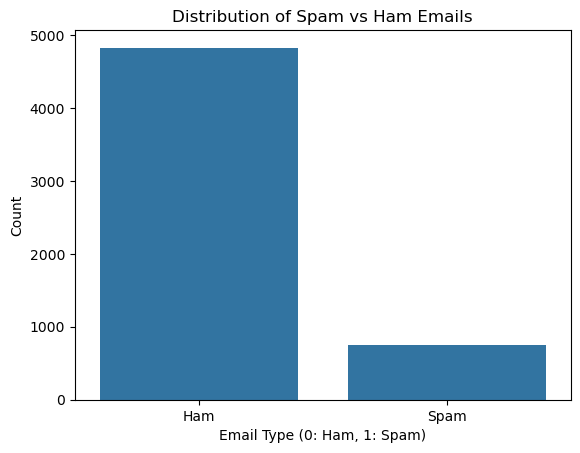

In [35]:
# Check the first few rows of the data to verify
print(df.head())

# Plot the distribution of spam vs ham
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham Emails')
plt.xlabel('Email Type (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_data = df.isnull()

# Count missing values per column
missing_counts = missing_data.sum()

# If there are any missing values, plot the heatmap
if missing_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(missing_data, cbar=True, cmap='YlOrRd', yticklabels=False)
    plt.title('Heatmap of Missing Values in Dataset')
    plt.xlabel("Columns")
    plt.ylabel("Records")
    plt.show()
else:
    print("✅ No missing values found in the dataset!")



✅ No missing values found in the dataset!


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)


In [ ]:
# Step 1: Vectorize the Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Example training data
X_train = ['Free money!', 'Hey, how are you?', 'Congratulations, you won a prize!']
y_train = [1, 0, 1]  # 1 = Spam, 0 = Not Spam

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Step 2: Train the Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)  # Ensure model is trained

# Step 3: Predict on New Input
message = input("enter the test")
processed_msg = message.lower()  # Basic preprocessing
msg_vector = vectorizer.transform([processed_msg])  # Vectorize the new message

# Step 4: Make Prediction
prediction = model.predict(msg_vector)[0]

# Step 5: Show Result
if prediction == 1:
    print("🚨 Spam detected!")
else:
    print("✅ Not spam.")

